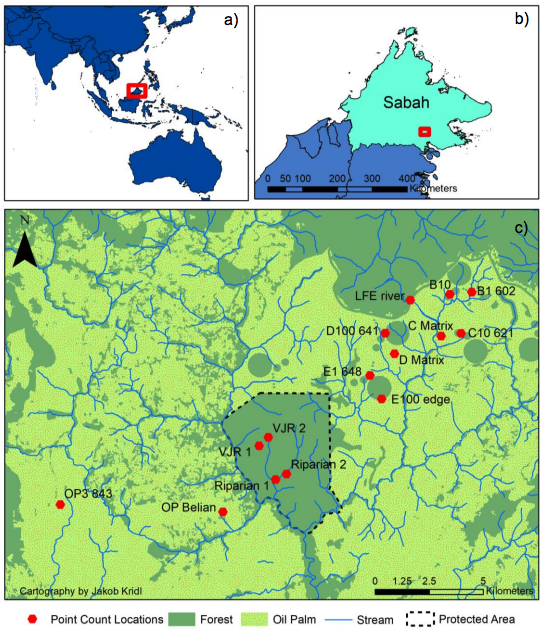

Credits: Kridl, J. (2021)


In [1]:
from IPython.display import Image

display(Image(filename='../data/study_area.png'))
print('Credits: Kridl, J. (2021)')

**Map of the study area and sampling locations at the SAFE project in Sabah, Malaysian Borneo.** Red points correspond to the 15 sampling sites where bird point counts were conducted (c) in different land-use types, where labels refer to the site names. 

- There are four sites in old growth forests (VJR 1, VJR 2, Riparian 1 and Riparian 2), 
- two sites in oil palm (OP Belian and OP3 843), 
- two sites in salvage-logged forest (C Matrix and D Matrix) 
- and seven sites in selectively logged forest (E100 edge, D100 641, C10 621, E1 648, B10, B1 602 and LFE river). 

Forest cover and oil palm area data were obtained from Gaveau, Salim, & Arjasakusuma (2016). SAFE study region (forest fragment boundaries and oil palm area) and stream network data were obtained from Ewers and Orme (2019) and Orme (2019), respectively.

Via *Kridl, J. (2021) Bird species co-occurrence patterns indicate altered community structure along a habitat quality gradient in Borneo. Unpublished Masters Thesis, University College London.*

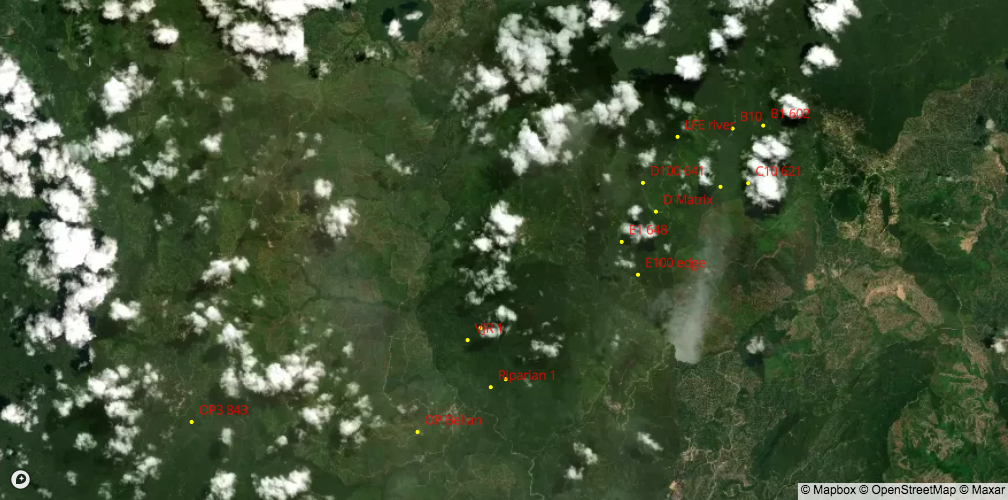

In [2]:
import plotly.graph_objects as go
%store -r rl 

mapbox_access_token = open("../.mapbox_token").read()

loc_df = rl.copy()
data = go.Scattermapbox(lat = list(loc_df['Latitude']),
                        lon = list(loc_df['Longitude']),
                        mode = 'markers+text',
                        marker = dict(size = 5, color = 'yellow'),
                        textposition = 'top right',
                        textfont = dict(size = 13, color = 'red'),
                        text = [loc_df['Location name'][i] for i in range(len(loc_df))],
                       )

layout = dict(width = 700, 
              height = 500,
              margin = dict(l = 0, t = 0, r = 0, b = 0, pad = 0),
              mapbox = dict(accesstoken = mapbox_access_token,
                          center = dict(lat = 4.69128, lon = 117.546),
                          style = 'satellite',
                          zoom = 11.2))

fig = go.Figure(data = data, layout = layout)
fig.show()

### Locations of currently available recordings

In [4]:
%store -r locations
%store -r filenames
%store -r df_rec

recordings = df_rec[df_rec['Audio_file'].isin(filenames)] # filtering the recordings dataframe only for available files
# recordings.sort_values(by = 'Site')

available_rec_loc = recordings['Site'].unique()
arl = locations[locations['Location name'].isin(available_rec_loc)].reset_index() # location df only with CURRENTLY AVAILABLE recordings 
print('we currently have access to recordings across', len(arl), 'locations')

we currently have access to recordings across 11 locations


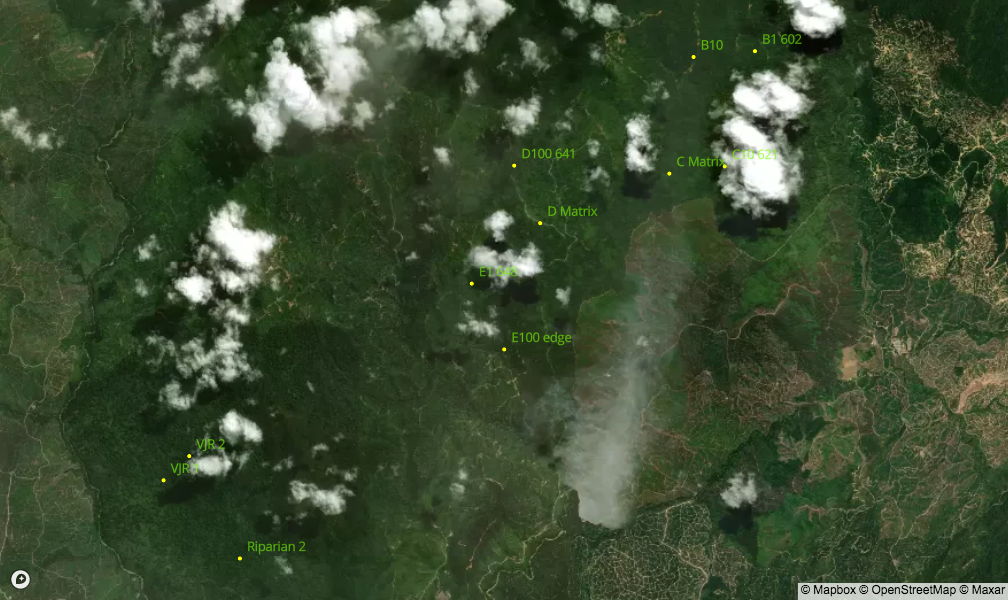

In [5]:
loc_df = arl.copy()
data2 = go.Scattermapbox(lat = list(loc_df['Latitude']),
                        lon = list(loc_df['Longitude']),
                        mode = 'markers+text',
                        marker = dict(size = 5, color = 'yellow'),
                        textposition = 'top right',
                        textfont = dict(size = 13, color = 'lawngreen'),
                        text = [loc_df['Location name'][i] for i in range(len(loc_df))],
                       )

layout2 = dict(width = 700, 
              height = 600,
              margin = dict(l = 0, t = 0, r = 0, b = 0, pad = 0),
              mapbox = dict(accesstoken = mapbox_access_token,
                          center = dict(lat = 4.69128, lon = 117.586),
                          style = 'satellite',
                          zoom = 12.2))

fig = go.Figure(data = data2, layout = layout2)
fig.show()

In [6]:
%store arl

Stored 'arl' (DataFrame)
